2023-01-12 11:59:53.847342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


     0    0
0  NaN  0.0
1  0.0  0.1
2  0.1  0.2
3  0.2  0.3
4  0.3  0.4
5  0.4  0.5
6  0.5  0.6
7  0.6  0.7
8  0.7  0.8
9  0.8  0.9
[[0.  0.1]
 [0.1 0.2]
 [0.2 0.3]
 [0.3 0.4]
 [0.4 0.5]
 [0.5 0.6]
 [0.6 0.7]
 [0.7 0.8]
 [0.8 0.9]]
[0.7 0.2 0.1 0.4 0.8 0.6 0.3 0.  0.5] [0.8 0.3 0.2 0.5 0.9 0.7 0.4 0.1 0.6]


2023-01-12 11:59:55.180654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 11:59:55.182723: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1/1 - 0s - loss: 7.4713e-06 - 206ms/epoch - 206ms/step
7.471349363186164e-06
1/1 [==============================] - 0s 304ms/step
[[0.8017842 ]
 [0.29646093]
 [0.19895098]
 [0.49879485]
 [0.8988327 ]
 [0.70227283]
 [0.39686036]
 [0.10562546]
 [0.6009743 ]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
None


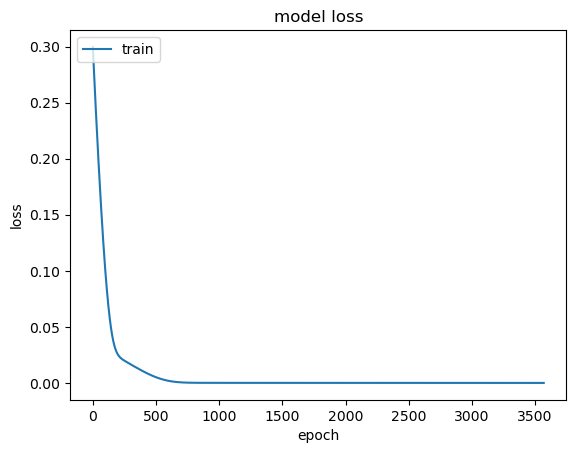

In [1]:
# Importing the required objects from libraries for learning the sampleEducbaSequence
import pandas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import layers
from pandas import DataFrame
from pandas import concat
# from tensorflow.keras.Model import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.utils import shuffle

tf.keras.backend.clear_session()
# tf.compat.v1.disable_eager_execution() #IF ERROR, UNCOMMENT
# sampleEducbaSequence creation
totalLength = 10
sampleEducbaSequence = [i/float(totalLength) for i in range(totalLength)]
# print(sampleEducbaSequence)
# x - y pairs are created
sampleDataFrameObj = DataFrame(sampleEducbaSequence)
# print(sampleDataFrameObj)
sampleDataFrameObj = concat([sampleDataFrameObj.shift(1), sampleDataFrameObj], axis=1)
print(sampleDataFrameObj)
sampleDataFrameObj.dropna(inplace=True)
# print(sampleDataFrameObj)
#  conversion of the created inputSampleValues to LSTM friendly structure
inputSampleValues = sampleDataFrameObj.values
print(inputSampleValues)
X, y = inputSampleValues[:, 0], inputSampleValues[:, 1]
X, y = shuffle(X, y, random_state=0)
print(X, y)
# print(X)
X = X.reshape(len(X), 1, 1)
# print(type(X[0][0][0]))

# 1. network definition
sampleEducbaModel = keras.Sequential()
sampleEducbaModel.add(LSTM(10, input_shape=(1,1)))
# sampleEducbaModel.add(Dense(100))
# sampleEducbaModel.add(Dense(100))
sampleEducbaModel.add(Dense(1))
# sampleEducbaModel.add(Dense(1))
# 2. network is compiled here
sampleEducbaModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error')
# 3. we will need to fit the created network
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor="loss",min_delta=0.00000001)
]
history = sampleEducbaModel.fit(X, y, epochs=500000, batch_size=len(X), verbose=0,callbacks=callbacks)
# 4. network evaluation needs to be done
calculatedLoss = sampleEducbaModel.evaluate(X, y, verbose=2)
print(calculatedLoss)
# 5. we can make the required achievedPredictions by using the created network
achievedPredictions = sampleEducbaModel.predict(X, verbose=1)
print(achievedPredictions)
print(sampleEducbaModel.summary())
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(sampleEducbaModel, to_file=dot_img_file, show_shapes=True)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()